<a href="https://colab.research.google.com/github/akhilps45/ICT-Assignments/blob/main/Perceptron_Activation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ============================================================
# Assignment: Perceptron & Activation Functions
# ============================================================
---

## Instructions:
- This assignment contains **two parts**.
- Fill in all code and explanation sections where indicated.
- Do NOT use high-level ML libraries like TensorFlow or PyTorch for implementation.
- You may use NumPy, Matplotlib, and scikit-learn for dataset generation and visualization.
---

## Part 1 — Perceptron from Scratch

### Q1. Dataset Preparation
1. Generate a **2D dataset** with 2 classes using `make_blobs` from scikit-learn.
2. Convert labels so that one class is `-1` and the other is `1`.
3. Visualize the dataset using a scatter plot.

**Your Task:**
- Write the code to generate and visualize the dataset.
- Provide the plot in your answer.


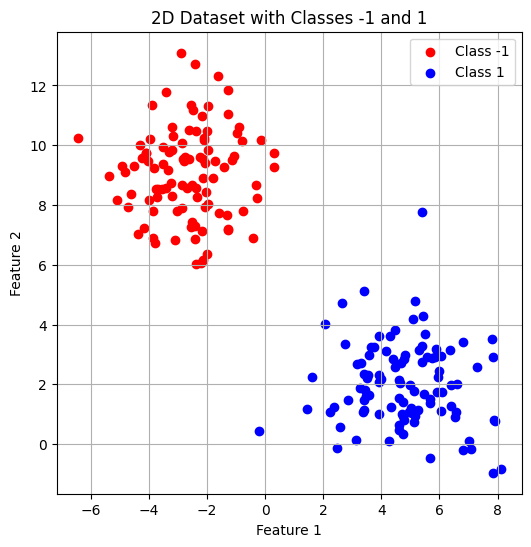

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Generate a 2D dataset with 2 classes
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42, cluster_std=1.5)

#Convert labels from {0, 1} to {-1, 1}
y = np.where(y == 0, -1, 1)

#Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Dataset with Classes -1 and 1")
plt.legend()
plt.grid(True)
plt.show()

### Q2. Perceptron Implementation
1. Create a Python class `Perceptron` with:
   - `__init__` — initializes learning rate, number of epochs, and weights/bias.
   - `fit(X, y)` — trains the perceptron using the **Perceptron Learning Rule**.
   - `predict(X)` — returns predictions for given input features.
2. Use the update rule:  
$$
w \gets w + \eta (y_i - \hat{y}_i) x_i
$$
3. Train the Perceptron on your dataset.

**Your Task:**
- Implement and train the Perceptron.
- Display the final weights and bias.


In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=10):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.where(linear_output >= 0, 1, -1)
                update = self.lr * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)

# Train
perceptron = Perceptron(learning_rate=0.1, n_epochs=10)
perceptron.fit(X, y)

print("Final Weights:", perceptron.weights)
print("Final Bias:", perceptron.bias)

Final Weights: [ 2.22565855 -0.23295496]
Final Bias: 0.6000000000000001


In [ ]:
# Train your Perceptron and print weights, bias here

### Q3. Decision Boundary
1. Write a function to plot the decision boundary of your trained perceptron.
2. Visualize the boundary along with the dataset.

**Your Task:**
- Provide the decision boundary plot.
- Explain in **2–3 sentences** how the perceptron separates the two classes.


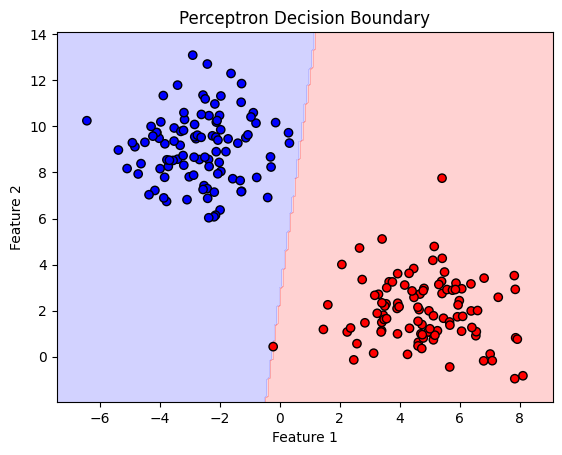

In [4]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, perceptron)

**Explanation (2–3 sentences):**



## Part 2 — Activation Functions

### Q4. Activation Function Implementation
Implement the following activation functions and their derivatives:
- Sigmoid
- Tanh
- ReLU
- Leaky ReLU
- Softmax

**Your Task:**
- For each activation function:
  - Write the forward pass formula.
  - Write the derivative formula.

**Table: Activation Function Formulas & Derivatives**
| Function   | Formula | Derivative |
|------------|---------|------------|
| Sigmoid    |         |            |
| Tanh       |         |            |
| ReLU       |         |            |
| Leaky ReLU |         |            |
| Softmax    |         |            |


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

### Q5. Testing Activation Functions
1. Choose input values: `[-2, -1, 0, 1, 2]`.
2. Apply each activation function to these inputs.
3. Record the outputs in a table.

**Output Table:**
| Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax |
|-------|---------|------|------|------------|---------|
| -2    |         |      |      |            |         |
| -1    |         |      |      |            |         |
| 0     |         |      |      |            |         |
| 1     |         |      |      |            |         |
| 2     |         |      |      |            |         |


In [6]:
inputs = np.array([-2, -1, 0, 1, 2])

print("Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax")
for val in inputs:
    sm = softmax(np.array([val, 0, 0]))[0]
    print(f"{val:5} | {sigmoid(val):.4f} | {tanh(val):.4f} | {relu(val):.4f} | {leaky_relu(val):.4f} | {sm:.4f}")


Input | Sigmoid | Tanh | ReLU | Leaky ReLU | Softmax
   -2 | 0.1192 | -0.9640 | 0.0000 | -0.0200 | 0.0634
   -1 | 0.2689 | -0.7616 | 0.0000 | -0.0100 | 0.1554
    0 | 0.5000 | 0.0000 | 0.0000 | 0.0000 | 0.3333
    1 | 0.7311 | 0.7616 | 1.0000 | 1.0000 | 0.5761
    2 | 0.8808 | 0.9640 | 2.0000 | 2.0000 | 0.7870


### Q6. Visualization of Activation Functions
1. Plot each activation function for input range `[-5, 5]`.
2. Compare their shapes visually.

**Your Task:**
- Provide the plots for all activation functions.
- In **3–4 sentences**, explain how the choice of activation function can affect learning in a neural network.


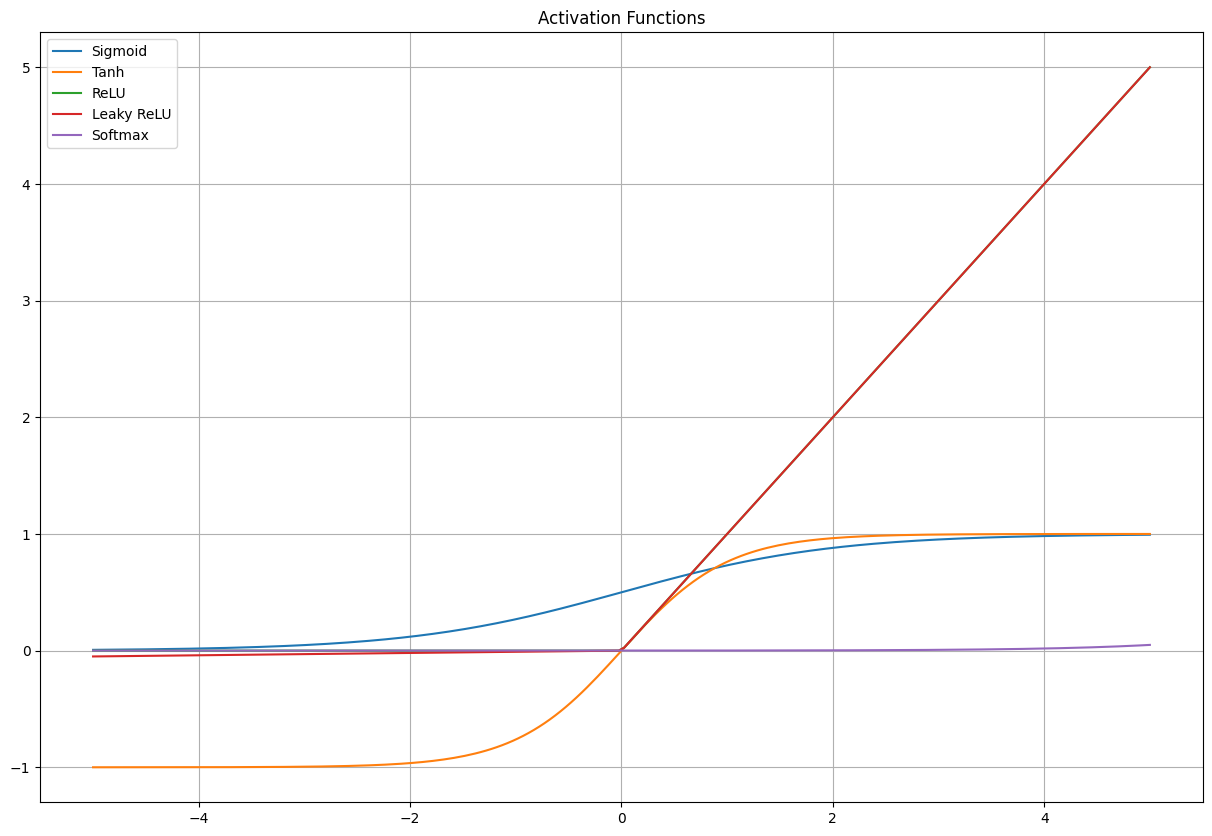

In [7]:
x_vals = np.linspace(-5, 5, 200)

plt.figure(figsize=(15, 10))

plt.plot(x_vals, sigmoid(x_vals), label="Sigmoid")
plt.plot(x_vals, tanh(x_vals), label="Tanh")
plt.plot(x_vals, relu(x_vals), label="ReLU")
plt.plot(x_vals, leaky_relu(x_vals), label="Leaky ReLU")
plt.plot(x_vals, softmax(x_vals), label="Softmax")

plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()

**Explanation (3–4 sentences):**

